In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(1)

# Problem Identification

$ min \sum_\limits{t=1}^T C_t^P P_t + C_t^W W_t + C_t^H H_t + C_t^L L_t + C_t^I I_t $

**Subject to:**  
$ P_t \le n_t W_t $  
$ W_t = W_{t-1} + H_t - L_t $  
$ I_t = I_{t-1} + P_t - D_t $  
$ P_t, W_t, H_t, L_t, I_t \ge 0$  

$ T $ = Planning time  
$ D_t $ = Number of units demanded  
$ n_t $ = Number of units produced  
$ C_t^P $ = Production cost  
$ C_t^W $ = Worker cost   
$ C_t^H $ = Hired worker cost  
$ C_t^L $ = Fired worker cost  
$ C_t^I $ = Inventory holding cost  
$ P_t $ = Number of units produced  
$ W_t $ = Number of workers available  
$ H_t $ = Number of hired worker  
$ L_t $ = Number of fired worker  
$ I_t $ = Number of inventory  

# Problem Approach

Optimize cost for year 2016 using 2015 and 2016 data.

**Constant Data 2016**  
Data for cost per unit for each variable and number of units demand and produced in 2016.

| $C_t^P$ | $C_t^W$ | $C_t^H$ | $C_t^L$ | $C_t^I$ | $D_t$   | $n_t$  |
| ------- | ------- | ------- | ------- | ------- | ------- | ------ |
| 5.33    | 7.0     | 4.0     | 2.0     | 4.26    | 5357118 | 1292   |

**Variable Number Data 2015**  
Using PSOGA result with 0 mutation probability

| $H_t$ | $L_t$ | $W_t$ | $P_t$ | $I_t$ |
| ----- | ----- | ----- | ----- | ----- |
| 118   | 236 | 3044 | 3178487 | 2198380 | 

*Encode*
- P -> 0
- W -> 1
- H -> 2
- L -> 3
- I -> 4

In [2]:
class Swarm:
  def __init__(self, func, *vars):
    self.position = list(vars)
    self.velocity = [0 for i in range(len(vars))]
    self.pbest = list(vars)
    self.fitness = func(vars)
    self.funcobj = func
  
  def updatePos(self):
    tempH= self.velocity[2] + self.position[2]
    tempL= self.velocity[3] + self.position[3]
    tempW= 3044+tempH-tempL
    tempP= 1292*tempW
    tempI= 2198380+tempP-5357118
    
    if tempW<0 or tempP<0 or tempI<0 or tempH<0 or tempI<0:
      return

    self.position[2]= tempH
    self.position[3]= tempL
    self.position[1]= tempW
    self.position[0]= tempP
    self.position[4]= tempI
  
  def updateFit(self):
    self.fitness = self.funcobj(self.position)
  
  def updatePbest(self):
    if self.funcobj(self.position)<self.funcobj(self.pbest):
      self.pbest = self.position
  
  def printSwarm(self):
    print("position :", *self.position)
    print("velocity :", *self.velocity)
    print("fitness :", self.fitness)
    print("pbest :", self.pbest)

In [26]:
class PSO:
  def __init__(self, n, omega, func, iteration, c1, c2):
    self.n = n
    self.omega = omega
    self.funcobj = func
    self.c1 = c1
    self.c2 = c2
    self.gbest = None
    self.swarms = []
    self.iteration = iteration
    self.listfitGbest=[]
    self.maxiter=0
  
  def initialize(self):
    h=np.random.uniform(100,300,self.n).tolist()
    l=np.random.uniform(100,300,self.n).tolist()
    w=[]
    for i in range(self.n):
      tempw = 3044+h[i]-l[i]
      w.append(tempw)
    p=[]
    for i in range(self.n):
      tempp = 1292*w[i]
      p.append(tempp)
    i=[]
    for j in range(self.n):
      tempi = 2198380+p[j]-5357118
      i.append(tempi)
    for j in range(self.n):
      tempSwarm = Swarm(self.funcobj,p[j],w[j],h[j],l[j],i[j])
      self.swarms.append(tempSwarm)

  def updateGbest(self, iter):
    for swarm in self.swarms:
      if self.gbest == None:
        self.gbest = swarm.pbest
      if self.funcobj(swarm.pbest)<self.funcobj(self.gbest):
        self.gbest = swarm.pbest
        self.maxiter = iter

  def updateVelocity(self):
    for swarm in self.swarms:
      for i in range(len(swarm.position)):
        if i==0 or i==1 or i==4:
          continue
        iner = self.omega*swarm.velocity[i]
        knowl = self.c1*random.random()*(swarm.pbest[i]-swarm.position[i])
        soc = self.c2*random.random()*(self.gbest[i] - swarm.position[i])
        swarm.velocity[i] = iner + knowl + soc
  
  def printPSO(self):
    print("n: ", self.n)
    print("omega: ", self.omega)
    print("c1: ", self.c1)
    print("c2: ", self.c2)
    print("maxiter: ", self.maxiter)
    print("gbest: ", self.gbest)
    print("gbest fitness: ", self.funcobj(self.gbest))
    plt.plot(self.listfitGbest)


  def run(self):
    self.initialize()
    for i in range(self.iteration):
      print(i)
      for swarm in self.swarms:
        #swarm.printSwarm()
        swarm.updateFit()
        swarm.updatePbest()    
      self.updateGbest(i)
      self.listfitGbest.append(self.funcobj(self.gbest))
      print(self.gbest)
      print(self.funcobj(self.gbest))
      self.updateVelocity()
      for swarm in self.swarms:
        swarm.updatePos()

In [24]:
def problem(input):
  output=5.33*input[0]+7*input[1]+4*input[2]+2*input[3]+4.26*input[4]
  return output

In [27]:
solveWithPSO = PSO(100, 1, problem, 100, 2, 2)
solveWithPSO.run()
print(len(solveWithPSO.listfitGbest))

0
[3678789.180977474, 2847.360047196187, 101.08394536433212, 297.7238981681448, 520051.18097747397]
21844295.669482145
1
[3437811.289162166, 2660.844651054308, 90.48535198061992, 473.6407009263115, 279073.2891621664]
19532321.518432327
2
[3180997.1592441816, 2462.072104678159, 60.39485476343007, 642.3227500852711, 22259.15924418159]
17068299.606803674
3
[3172609.0763715543, 2455.5797804733393, 80.04068463785764, 668.4609041645183, 13871.076371554285]
16987943.305413395
4
[3172609.0763715543, 2455.5797804733393, 80.04068463785764, 668.4609041645183, 13871.076371554285]
16987943.305413395
5
[3172609.0763715543, 2455.5797804733393, 80.04068463785764, 668.4609041645183, 13871.076371554285]
16987943.305413395
6
[3172609.0763715543, 2455.5797804733393, 80.04068463785764, 668.4609041645183, 13871.076371554285]
16987943.305413395
7
[3172609.0763715543, 2455.5797804733393, 80.04068463785764, 668.4609041645183, 13871.076371554285]
16987943.305413395
8
[3172609.0763715543, 2455.5797804733393, 80.

n:  100
omega:  1
c1:  2
c2:  2
maxiter:  3
gbest:  [3172609.0763715543, 2455.5797804733393, 80.04068463785764, 668.4609041645183, 13871.076371554285]
gbest fitness:  16987943.305413395


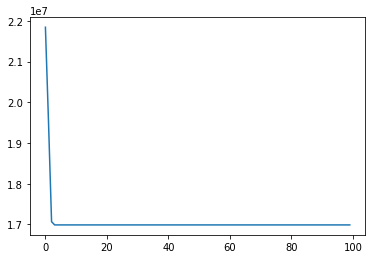

In [28]:
solveWithPSO.printPSO()

In [ ]:
2198380+3158745-5357118

7

In [ ]:
1292*2444

3157648